# Linear Regression in python

In [116]:
import numpy as np
from random import random
from matplotlib import pyplot as plt

## Generate random points for linear regression
$$y=mx+c$$
assume $m$ and $c$ add some $noise$

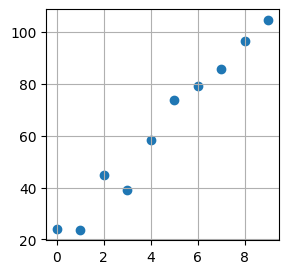

In [117]:

x=np.arange(0,10)
m=11
noise=10
c=15#c constant
noiseDrift=[round(2*noise*random()-noise,2) for n in range(0,len(x))]
y=[(y*m+c)+noiseDrift[i] for i,y in enumerate(x) ]
fig,ax=plt.subplots(1,figsize=(3,3))
ax.plot(hold=True)
ax.grid()
ax.scatter(x,y)

# Estimate yPredict with m x and c

In [118]:
# m=1#initial guess
# c=0 #initial guess

def yEstimate(x,m,c):
    x=np.array(x)
    yp=np.round(np.array(x*m+c),2)
    return yp
yest=yEstimate(x,m,c)
[yest,y]

[array([ 15,  26,  37,  48,  59,  70,  81,  92, 103, 114]),
 [24.03,
  23.75,
  44.72,
  39.230000000000004,
  58.58,
  73.85,
  79.17,
  85.69,
  96.59,
  104.78]]

# Cost function
## Mean Squared Error (MSE)

In [119]:
def errorEst(x,y,m,c):
    e=[]
    for i,(xt,yt) in enumerate(zip(x,y)):
        yp=yEstimate(xt,m,c)
        e.append(yp-yt)


    return np.array(e)


errorVector=errorEst(x,y,m,c)
errorVector

array([-9.03,  2.25, -7.72,  8.77,  0.42, -3.85,  1.83,  6.31,  6.41,
        9.22])

# Gradient decent with partial derevative
Estimate Cost (MSE) and update m and c with partial derevative and gradient decent

In [120]:
def costFn(x,y,m,c):
    e=errorEst(x,y,m,c)
    cost=np.sum(e**2)/len(e)
    return cost


def update(x,y,m,c,alpha):
    e=errorEst(x,y,m,c)
    # Partial derivative of cost function with respect to m and c
    
    dele_m=2*np.sum(e*x)/len(e)
    dele_c=2*np.sum(e)/len(e)

    # or Gradient decent with partial derevative and learning rate
    m0=m-alpha*dele_m
    c0=c-alpha*dele_c
    return m0,c0

cost=costFn(x,y,m,c)
cost


40.737509999999986

## Plot helper

In [121]:
def testPlot(x,y,m,c):
    yest=yEstimate(x,m,c)
    fig,ax=plt.subplots(1,figsize=(8,8))
    ax.plot(hold=True)
    ax.grid()

    ax.scatter(x,y,label='Actual data points')

    ax.plot(x,yest,'-r',label='Estimated line with linear regression')
    ax.legend()
    ax.set_title("y=m*x+c")
    ax.text(0.5,0.5,"m="+str(m)+", c="+str(c),transform=ax.transAxes)
    # return yest

## Iterate and update m and c
1. change initial guesses 
1. learning rate
1. number of iterations
1. observe result

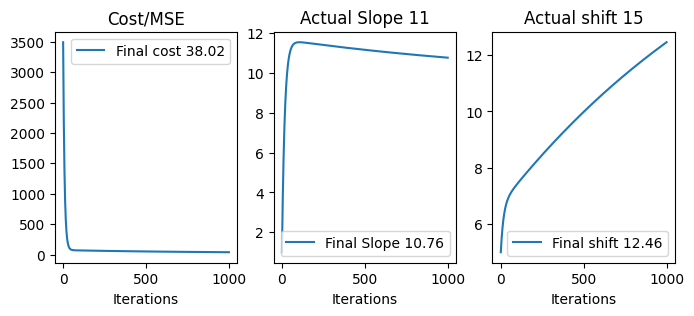

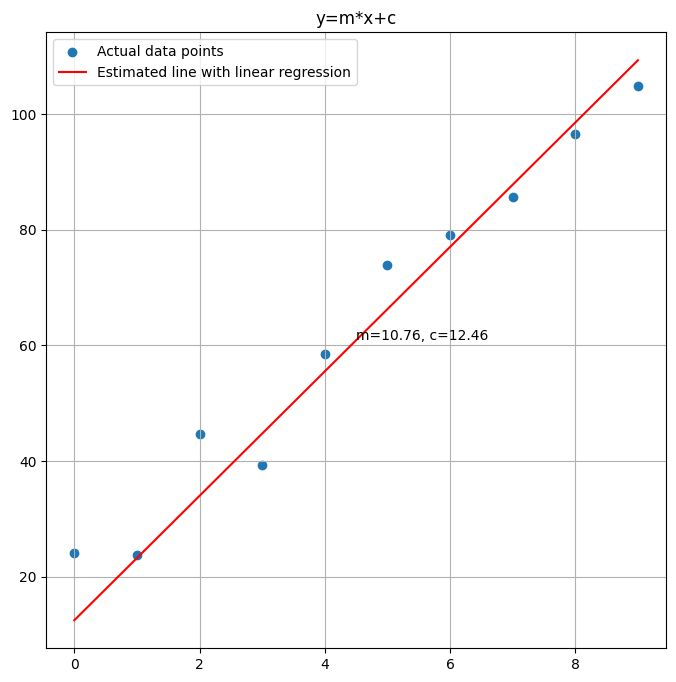

In [122]:
m0=[1]#initial guess
c0=[5]#initial guess
alpha=0.001#learning rate
cost=[]


# iteration loop
for i in range(1000):
    costu=costFn(x,y,m0[-1],c0[-1])
    mu,cu=update(x,y,m0[-1],c0[-1],alpha)
    m0.append(mu)
    c0.append(cu)
    cost.append(round(costu,2))

# print(m0)
mFinal=round(m0[-1],2)
cFinal=round(c0[-1],2)

plt2,ax2=plt.subplots(1,3,figsize=(8,3))
ax2[0].set_title('Cost/MSE')
ax2[0].plot(cost,label=f'Final cost {cost[-1]}')
ax2[0].legend()
ax2[0].set_xlabel("Iterations")


ax2[1].set_title(f'Actual Slope {m}')
ax2[1].plot(m0,label=f'Final Slope {mFinal}')
ax2[1].legend()

ax2[1].set_xlabel("Iterations")


ax2[2].set_title(f'Actual shift {c}')
ax2[2].plot(c0,label=f'Final shift {cFinal}')
ax2[2].legend()
ax2[2].set_xlabel("Iterations")

(cost[-1],mFinal,cFinal)
testPlot(x,y,mFinal,cFinal)

# References
1. [youtube](https://www.youtube.com/results?search_query=linea%20regression%20math)
1. [maths](https://towardsdatascience.com/introduction-to-machine-learning-algorithms-linear-regression-14c4e325882a)
1. [python implementation](https://realpython.com/linear-regression-in-python/)
1. [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)